<a href="https://colab.research.google.com/github/hamisB/machine-learning/blob/master/HR_Employee_Clustering%26PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import librairies & Data

In [1]:
# import librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling as pp
import matplotlib.pyplot as plt
#Get data 
data = pd.read_csv("https://storage.googleapis.com/source_market_fr/data_for_ml/HR_employee_attrition.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Copy data to the dataframe dataset
dataset=data.copy()

In [3]:
# Get data info and columns type 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [111]:
# Set Employee Number as Index 
dataset.set_index('EmployeeNumber', inplace=True)
# Preview the data 
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## EDA

In [0]:
# Pandas profiling for quick EDA 
pp.ProfileReport(dataset)

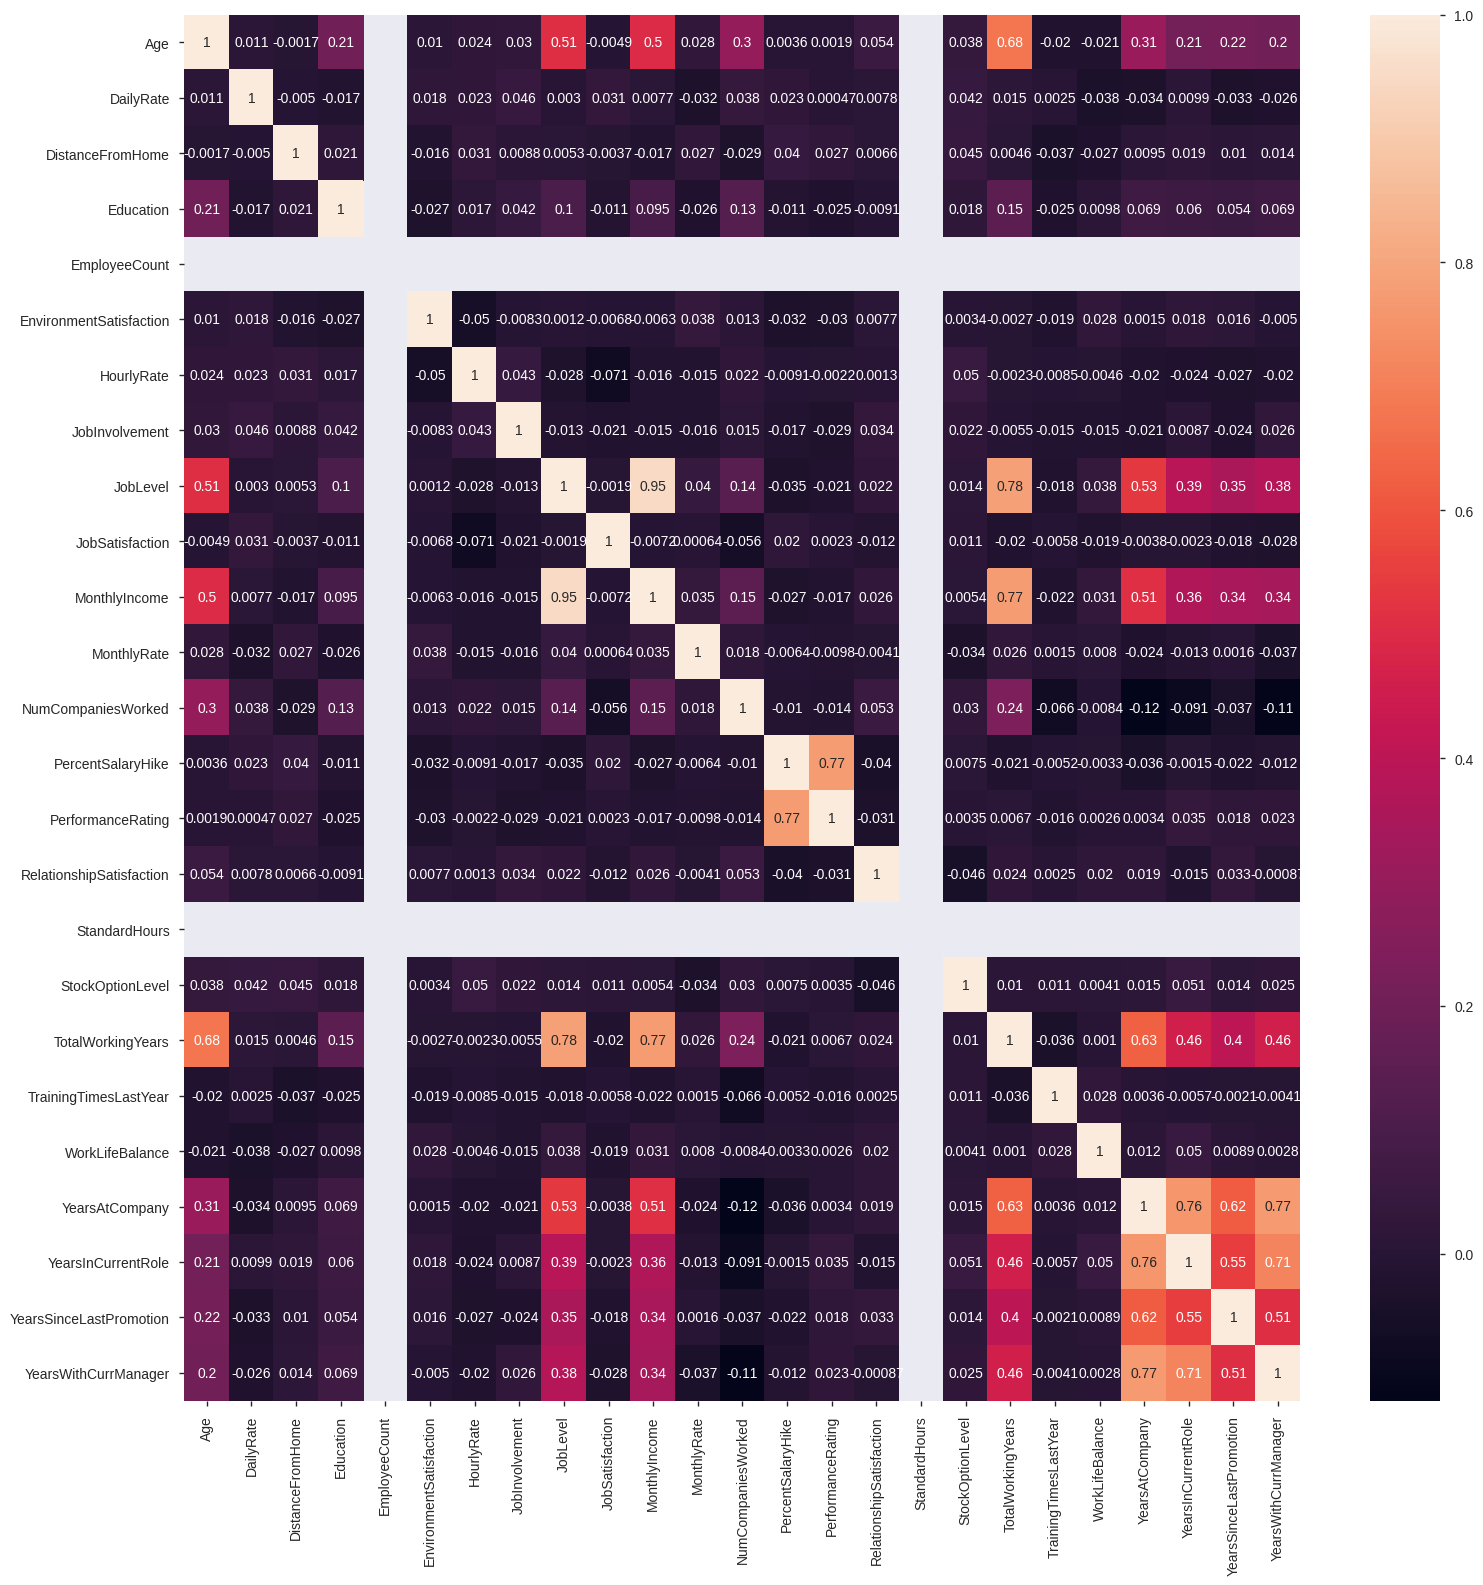

In [114]:
# Feature Correlation
plt.figure(figsize=(18,18))
sns.heatmap(dataset.corr(), annot=True)

### Data Processing
---




In [0]:
#Drop some constant variables 
dataset_ml = dataset.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [0]:
# Import Kmeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 

In [117]:
# Gathering variables by typology
numeric_features = dataset_ml.select_dtypes(include=['int64']).columns
categorical_features = dataset_ml.select_dtypes(include=['object']).columns
print(f"numeric_features :  {numeric_features} \n ============================================================================================  ")
print(f"categorical_features :  {categorical_features} \n ============================================================================================  ")
print ( dataset_ml.shape[1], '/' ,len(numeric_features)+ len(categorical_features))

numeric_features :  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object') 
categorical_features :  Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object') 
31 / 31


In [118]:
# Encoding categorical  features
data_cat = pd.get_dummies(dataset[categorical_features])

# Standardized numerical features
data_num = pd.DataFrame(scaler.transform(dataset[numeric_features]), index=dataset.index , columns=dataset[numeric_features].columns)

# Merge the two sub dataset 
final = data_cat.merge(data_num , right_index=True, left_index=True)

# print all the column and the head of the data 
print (final.columns)
final.head()

Index(['Attrition_No', 'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate',

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
4,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
5,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
7,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


Elbow method to determine the number of clusters

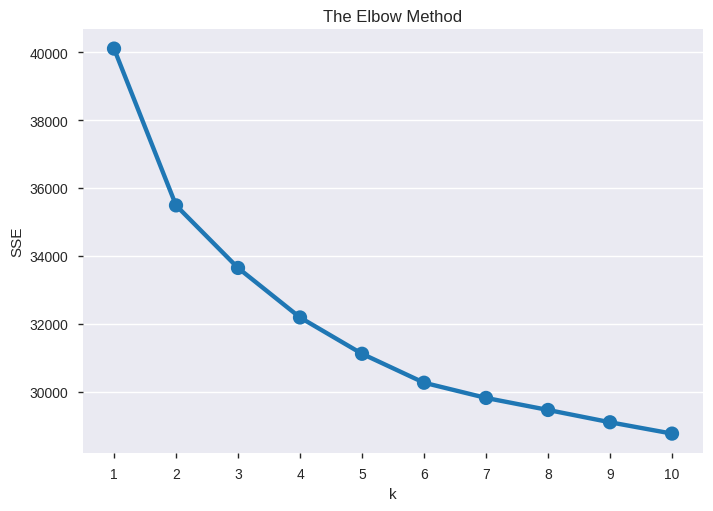

In [119]:
sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=1).fit(final)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_ 

# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### Kmeans Clustering
---

In [0]:
# Kmeans clustering 
clus = KMeans(n_clusters=4, random_state=1).fit(final)

In [121]:
# Adding cluster label to dataset 
cluster = dataset_ml.merge(pd.DataFrame(clus.labels_, index=final.index).rename(columns=({0:'cluster_label'})) , right_index=True, left_index=True)
# Summary data with cluster label
cluster.groupby('cluster_label').mean().T

cluster_label,0,1,2,3
Age,35.280612,48.091324,36.207715,34.302228
DailyRate,792.561224,822.091324,791.836795,804.213092
DistanceFromHome,9.770408,8.634703,9.409496,9.103064
Education,2.811224,3.045662,3.038576,2.841226
EnvironmentSatisfaction,2.637755,2.748858,2.827893,2.686630
HourlyRate,66.168367,65.100457,64.041543,66.924791
JobInvolvement,2.704082,2.671233,2.783383,2.729805
JobLevel,1.724490,4.068493,2.094955,1.530641
JobSatisfaction,2.734694,2.648402,2.792285,2.721448
MonthlyIncome,5007.367347,15422.602740,6164.394659,4349.462396



*   Cluster 0 : Newly Manager in the company  
*   Cluster 1 : Top Manager employee with long experience in their field 
*   Cluster 2 : Managers 
*   Cluster 3 : New Young Worker in the company



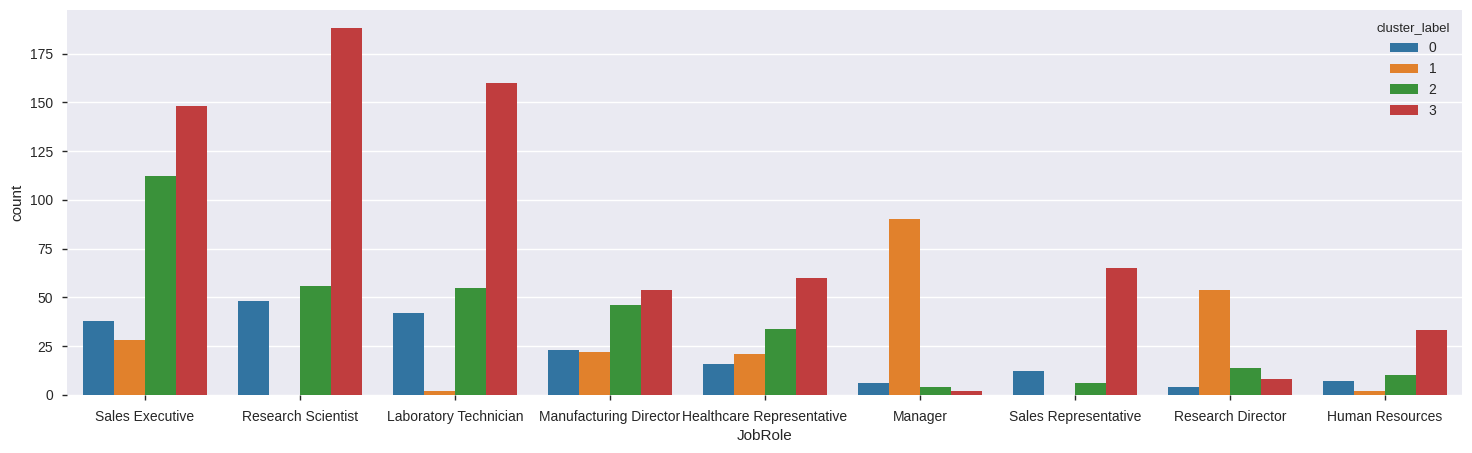

In [149]:
#Check JobRole with cluster 
plt.figure(figsize=(18,5))
sns.countplot(x="JobRole",hue='cluster_label', data=cluster , )

More of employee in cluster_1 are Manager as we already seen previously

#### Dimensional reduction with PCA

In [94]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

# Fit the data with 2 compenent's PCA
pca = PCA(n_components=2)
print(pca.fit_transform(final))
print(pca.explained_variance_ratio_)

[[-0.3723006  -1.67659351]
 [ 0.56517207  2.51368915]
 [-2.54774709 -1.16394613]
 ...
 [-1.20173492  1.64140498]
 [ 1.03482    -0.41173323]
 [-1.20834748 -0.44068924]]
[0.17305822 0.06760153]


In [150]:
# Get the two compenents of the PCA
pca_data = cluster[['cluster_label']].merge(pd.DataFrame(pca.fit_transform(final) , index=final.index , columns=['PC1','PC2']), right_index=True, left_index=True )
pca_data.head(10)

,cluster_label,PC1,PC2
EmployeeNumber,,,
1,3,-0.372287,-1.650756
2,0,0.565183,2.521605
4,3,-2.547760,-1.174051
5,3,-0.882716,-0.161857
7,3,-1.907866,-1.079047
8,2,-0.687616,1.054869
10,0,-1.302871,-0.245203
11,0,-2.988984,2.049103
12,0,1.071312,2.573479


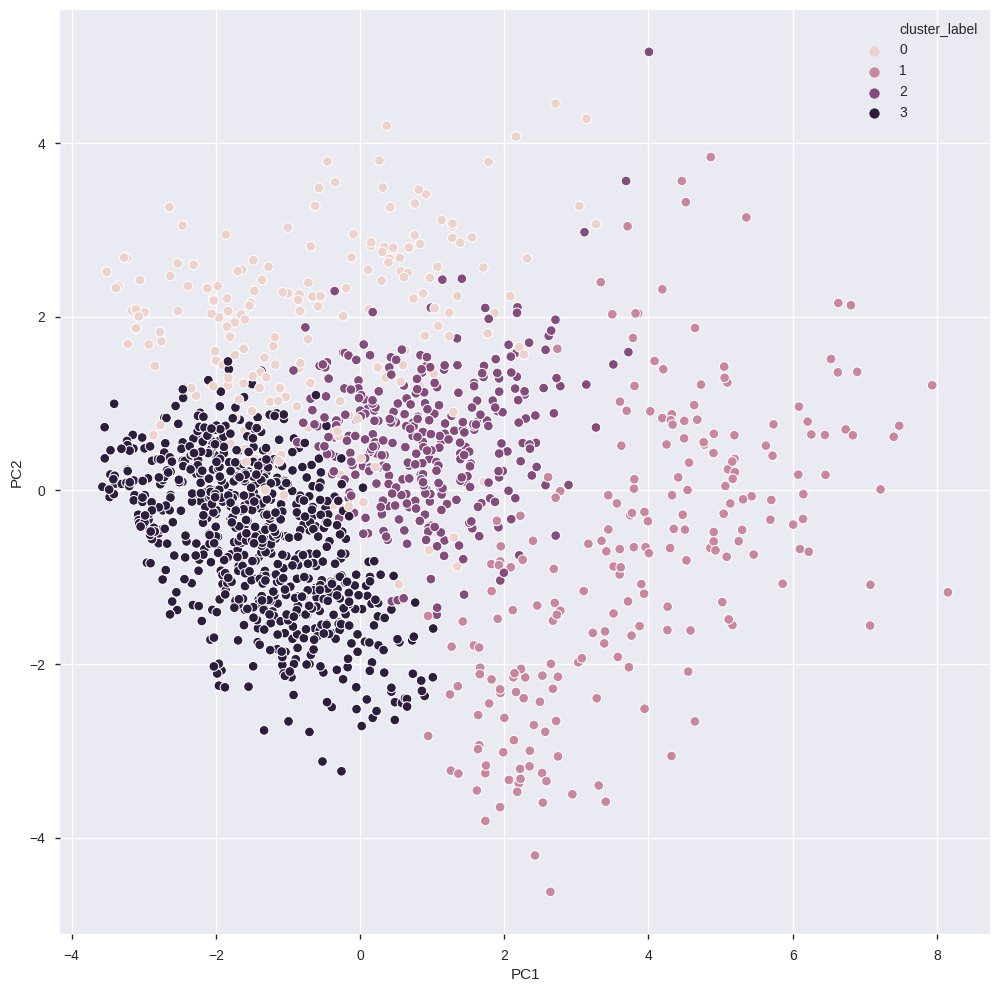

In [151]:
# Scatterplot PCA componets and Cluster
plt.figure(figsize=(12,12)) 
sns.scatterplot(data=pca_data, x='PC1', y='PC2', hue='cluster_label')